# Proyek Analisis Data: Bike Sharing
- **Nama:** Rakha Elang Gunawan
- **Email:** rakhae.g@gmail.com
- **ID Dicoding:** rakhaeg

## Menentukan Pertanyaan Bisnis
- Bagaimana penggunaan sepeda berdasarkan hari dalam seminggu?
- Apakah ada pola musiman dalam penggunaan sepeda?

## Import Semua Packages/ Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Insight 
- Dataset day_df memiliki 16 kolom.
- Kolom instant saya kira mempresentasikan indeks atau hari.
- Kolom dteday mempresentasikan tanggal kejadian.
- Kolom season mempresentasikan musim.
- Kolom yr mempresentasikan tahun kejadian.
- Kolom mnth mempresentasikan bulan kejadian.
- Kolom holiday mempresentasikan hari libur kerja. 
- Kolom weekday mempresentasikan hari kejadian.
- Kolom workingday mempresentasikan hari kejadian termasuk hari kerja atau tidak.
- Kolom weathersit mempresentasikan cuaca pada haris kejadian.
- Kolom temp mempresentasikan kondisi suhu pada kejadian.
- Kolom atemp mempresentasikan kondisi shuhu pada kejadian.
- Kolom hum mempresentasiakn kelembahan pada kejadian.
- Kolom windspeed mempresentasikan kecepatan angin pada kejadian.
- Kolom casual mempresentasikan jumlah pelanggan kasual pada kejadian.
- Kolom registered mempresentasikan jumlah pelanggan terdaftar pada kejadian.
- Kolom cnt mempresentasikan jumlah total antara jumlah pelanggan kasual dan jumlah pelanggan terdaftar. 

### Assesing Data

### Menilai Data day_df

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan dataset diatas menjelaskan bahwa
1. Dataset terdapat 731 baris, yang mempresentasikan hari.
3. Dataset memiliki 11 kolom bertipe int64. Kolom tersebut meliputi variabel instant, season, year, month, holiday, weekday, working day dan dll.
4. Dataset memiliki 4 kolom bertipe float64. Kolom tersebut meliputi variabel suhu, kelembapan, dan kecepatan angin.
5. Dataset memiliki 1 kolom bertipe object. Kolom tersebut mempresentasikan tanggal. 
6. Tidak ada nilai yang hilang atau missing values.
7. Kolom cnt mempresentasikan total hitungan antara jumlah pelanggan kasual dan pelanggan terdaftar. 

Rekomendasi perbaikan dataset
1. Konversi kolom dteday ke Format Tanggal datetime.

In [13]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [15]:
day_df['dteday'].nunique()

731

In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Insight: 
- Hari Kerja atau Hari Libur
1. Variabel holiday memiliki mean 0.028728, menujukkan bahwa hanya sekitar 2.87% dari 731 hari adalah hari libur.
2. Variabel working day memiliki mean 0.683995, menujukkan bahwa hanya sekitar 68% dari 731 hari adalah hari kerja atau hari bukan weekend dan hari libur.

- Kondisi Cuaca
1. Variabel temp dan variabel atemp memiliki kesamaan yaitu penyebaran nilai, menujukkan bahwa kestabilan antara kedua variabel tersebut dari hari ke hari.
2. Variabel hum dan windspeed memiliki kesaamaan yaitu penyebaran nilai, menujukkan kestabilan dari hari ke hari.

- Jumlah Pengguna
1. Rata-rata pengguna terdaftar jauh lebih tinngi (3656) dibandingkan pengguna biasa atau casual (848), menujukkan bahwa pengguna terdaftar mendominasi penggunaan sepeda.
2. Rata-rata total pengguna 4504 dan standar deviasinya 1937, menujukkan variasi jumlah pengguna setiap harinya atau tidak konsisten total pengguna setiap hari.



### Cleaning Data

Proses Cleaning Data
1. Pengubahan tipe data kolom dteday menjadi tipe data tanggal.
2. Pemeriksaan data logika kolom cnt. 

dteday saat ini bertipe object diubah menjadi tipe datetime untuk mempermudah analisis data berbasis waktu.

In [21]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

## Exploratory Data Analysis (EDA)

Saya melakukan EDA secara efektif dengan cara terbuka. Artinya analisanya tidak berdasarkan asumsi apapun. Analisa dibawah ini mencari insight, pola, hubungan dan anomali pada dataset. Hasil dari proses ini akan menjadi pondasi untuk merumuskan hipotesis. 

### Memahami Distribusi Setiap Variabel

Tujuan proses ini untuk melihat bagaimana nilai-nilai dalam setiap variabel tersebar dan apakah terdapat distribusi yang normal, skewed, dan terdapat anomali.

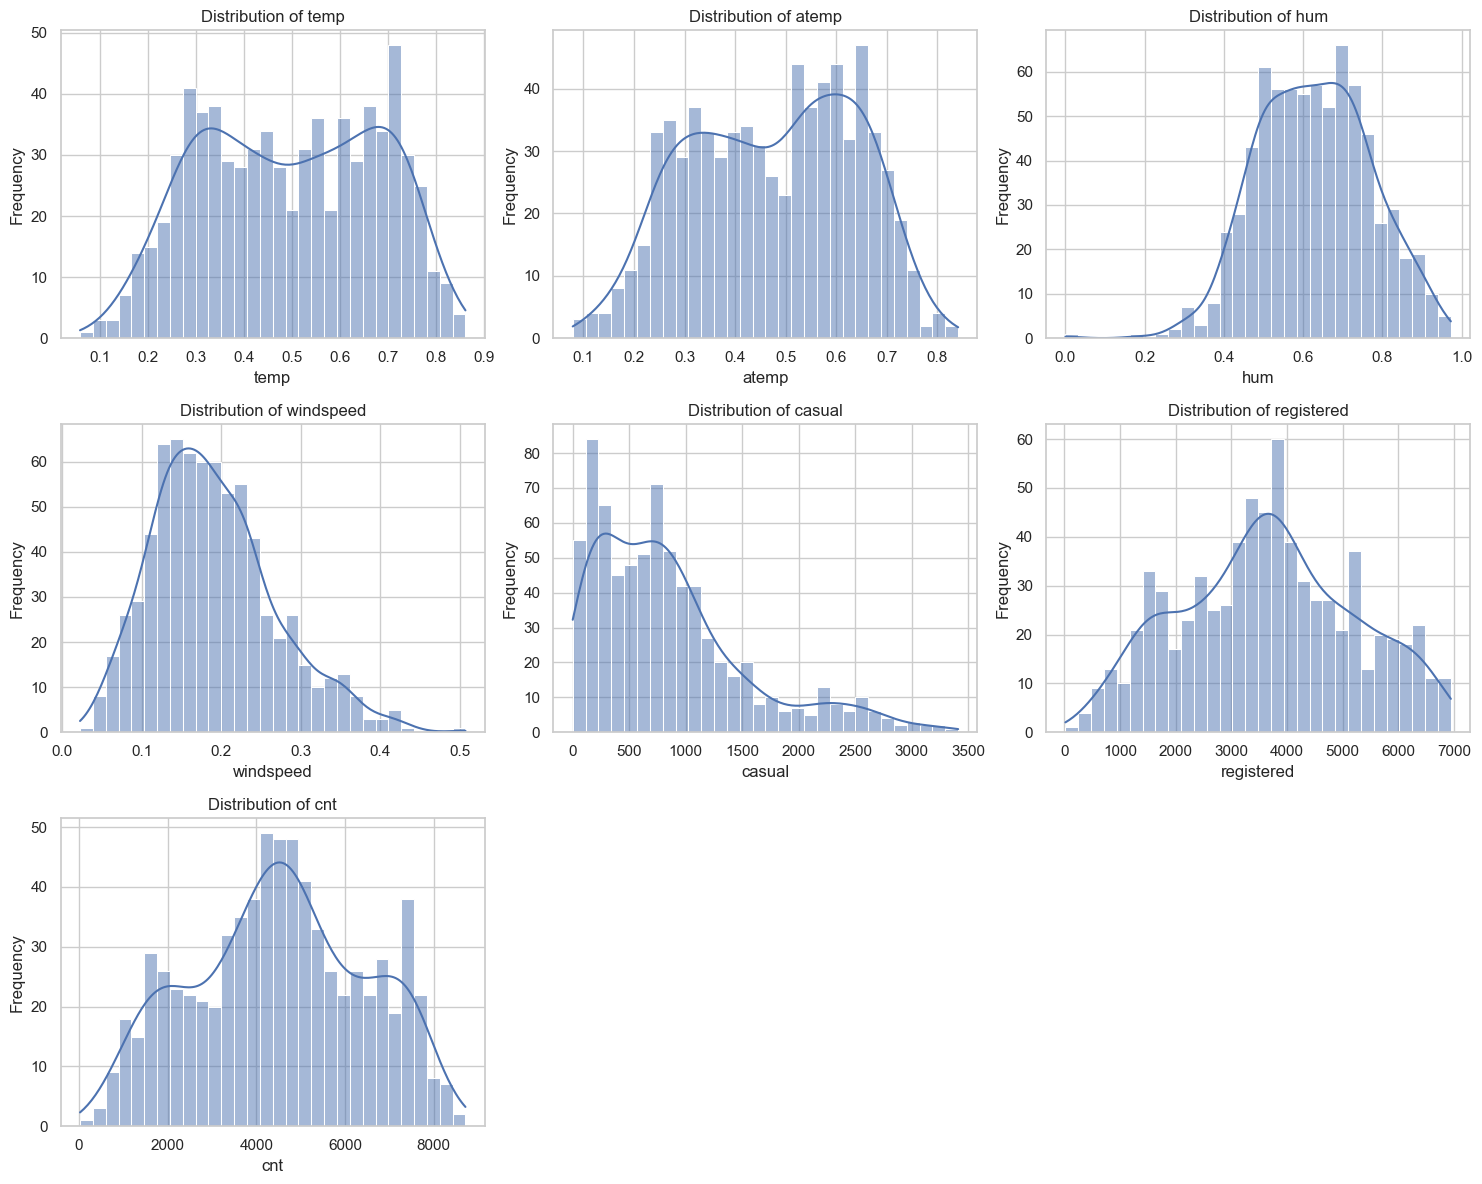

In [26]:
sns.set(style="whitegrid")

numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15, 12))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(day_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Mendeteksi Korelasi Antar Variabel

Untuk memahami hubungan antar variabel, terutama variabel numerik, dan melihat apakah ada korelasi yang signifikan

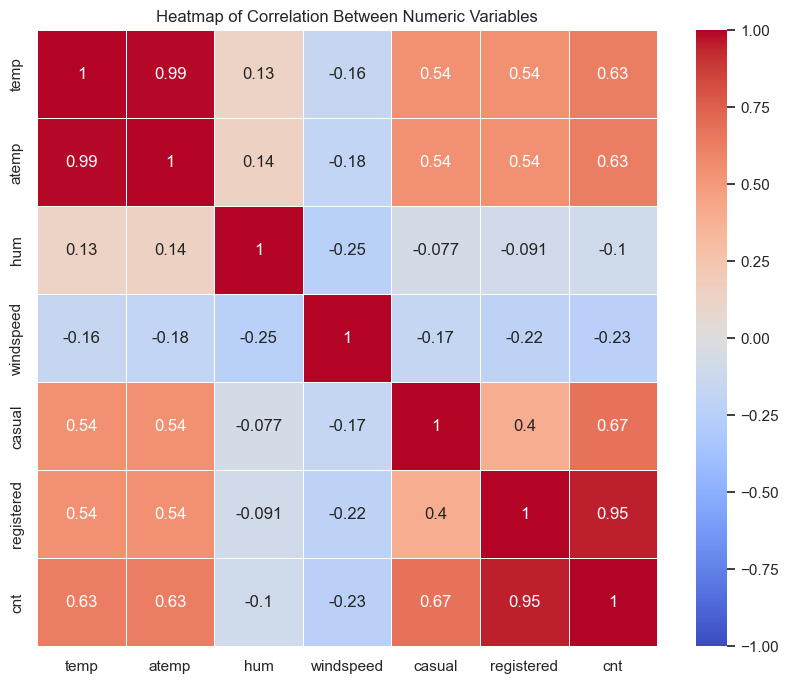

In [29]:
sns.set(style="white")
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = day_df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Heatmap of Correlation Between Numeric Variables')
plt.show()

### Mengidentifikasi Outliers dan Anomali

Untuk mendeteksi adanya outlier yang mempengaruhi analisis. Proses mendeteksinya menggunakan Boxplot dan IQR.

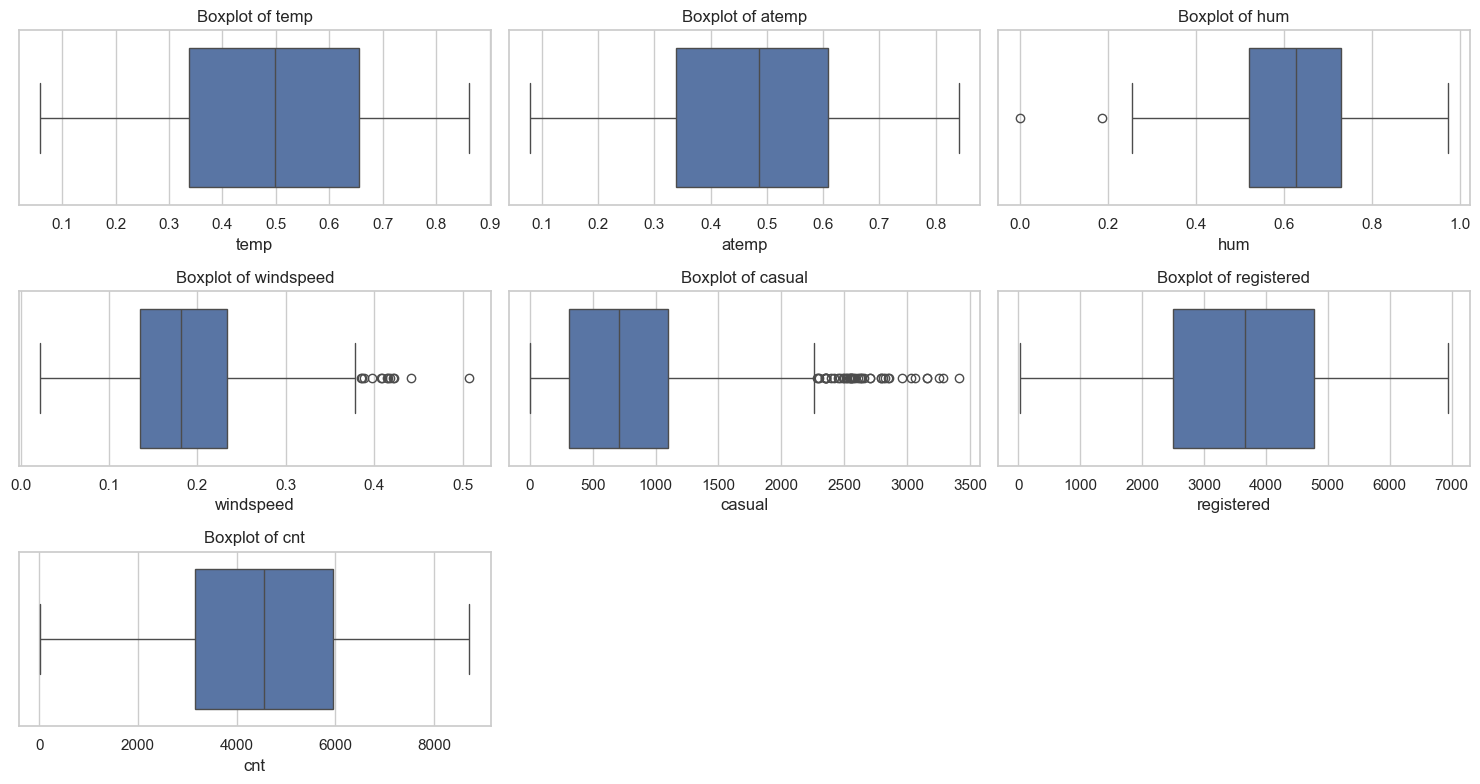

In [32]:
sns.set(style="whitegrid")

numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=day_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [33]:
for column in numeric_columns:
    Q1 = day_df[column].quantile(0.25)
    Q3 = day_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = day_df[(day_df[column] < lower_bound) | (day_df[column] > upper_bound)]
    print(f'Outliers for {column}:')
    print(outliers[[column]])
    print('\n')

Outliers for temp:
Empty DataFrame
Columns: [temp]
Index: []


Outliers for atemp:
Empty DataFrame
Columns: [atemp]
Index: []


Outliers for hum:
         hum
49  0.187917
68  0.000000


Outliers for windspeed:
     windspeed
44    0.417908
49    0.507463
93    0.385571
94    0.388067
292   0.422275
382   0.415429
407   0.409212
420   0.421642
432   0.441563
433   0.414800
450   0.386821
666   0.398008
721   0.407346


Outliers for casual:
     casual
148    2355
183    2282
184    3065
196    2418
246    2521
281    2397
441    3155
447    2469
455    2301
456    2347
462    3252
469    2795
470    2846
476    2541
490    2496
497    2622
504    3410
505    2704
511    2855
512    3283
513    2557
518    2795
519    2494
525    2708
532    2963
533    2634
539    2657
540    2551
550    2562
560    2355
568    2544
581    2345
595    2827
609    2352
610    2613
617    2570
623    3160
630    2512
631    2454
637    2589
644    3031
658    2806
665    2643
680    2290


Outliers for r

### Insight
1. Berdasarkan analisa korelasi, variabel temp dan atemp mempunyai nilai cukup positif terhadap variabel jumlah penggunaan casual, penggunaa registered, dan total penggunaan layanan peminjaman sepeda.
2. Berdasarkan analisa distribusi data setiap variabel sebagai berikut
   - Pada variabel temperature terdapat dua puncak di distribusinya.
   - Pada variabel atemp terdapat dua puncak juga di distribusinya walaupun sedikit ada perbedaan dari variabel temperature.
   - Pada variabel humidity terdapat puncak disekitar nilai 0.6 hingga 0.8, artinya sebagai besar nilai kelembapan ada di rentang sedang hingga tinggi.
   - Pada variabel windspeed terdapat puncak di sekitar 0.1 hingga 0.3, artinya sebagai besar kecepatan angin kecil dan jarang sekali angin berkecepatan besar.
   - Pada variabel casual terdapat puncak di sekitar 0 hingga 1800, artinya sedikit hari yang pengguna casual memnijam sepeda dengan tinggi.
   - Pada variabel registered memiliki ditribusi yang simteris, artinya terdapat kestabilan anggo pengguna registered menggunakan layanan setiap hari.
   - Pada variabel cnt sedikit cenderung konsisten dari total penggunaan layanan setiap hari.
3. Berdasarkan analisa outlier
   - Variabel humidity memiliki outlier di bawah nilai 0.1
   - Variabel windspeed memiliki outlier di atas 0.3
   - Variabel casual memiliki outlier diatas 20000
   - Variabel temp, atemp, registered, dan cnt menunjukkan distribusi yang cukup stabil tanpa nilai ekstrem yang signifikan.

Rumusan Pertanyaan 
1. Bagaimana cara mengoptimalkan promosi dan pengelolaan layanan peminjaman sepeda berdasarkan cuaca dan musim?
2. Apa strategi terbaik untuk meningkatkan penggunaan layanan peminjaman sepeda di hari-hari dengan tingkat penggunaan yang rendah?

## Visualization & Explanatory Analysis

### Bagaimana cara mengoptimalkan promosi dan pengelolaan layanan peminjaman sepeda berdasarkan cuaca dan musim?

In [38]:
day_df['season'] = day_df['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear', 2: 'Cloudy/Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

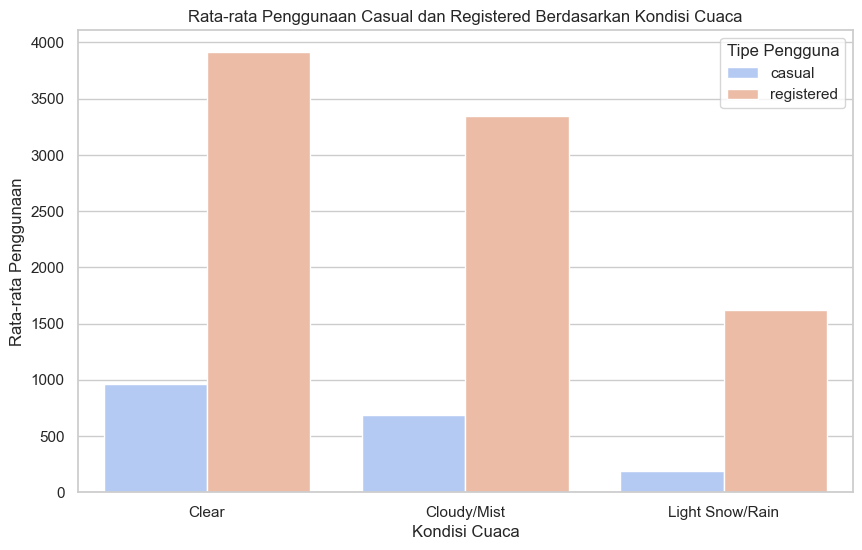

In [39]:
weather_usage = day_df.groupby('weathersit')[['casual', 'registered']].mean().reset_index()

weather_usage_melt = weather_usage.melt(id_vars='weathersit', value_vars=['casual', 'registered'], 
                                        var_name='user_type', value_name='usage')
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='usage', hue='user_type', data=weather_usage_melt, palette='coolwarm')
plt.title('Rata-rata Penggunaan Casual dan Registered Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penggunaan')
plt.legend(title='Tipe Pengguna')
plt.show()

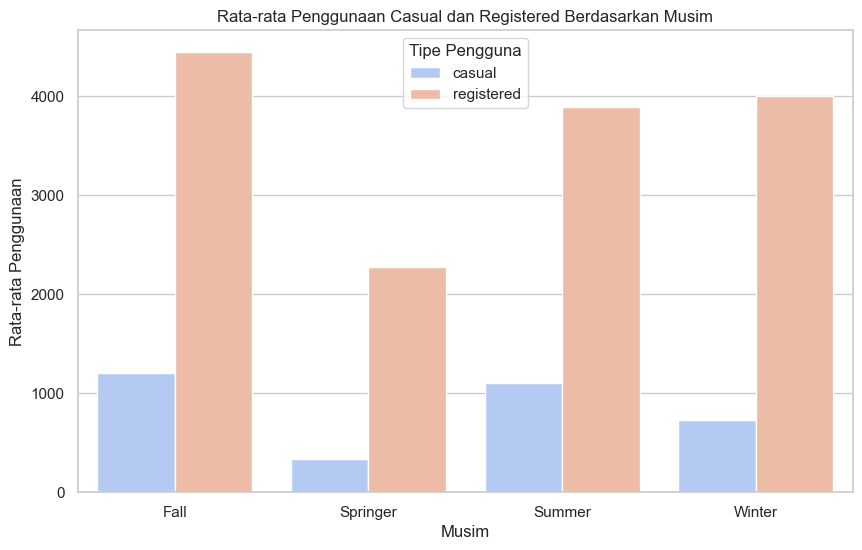

In [40]:
season_usage = day_df.groupby('season')[['casual', 'registered']].mean().reset_index()

season_usage_melt = season_usage.melt(id_vars='season', value_vars=['casual', 'registered'], 
                                      var_name='user_type', value_name='usage')

plt.figure(figsize=(10,6))
sns.barplot(x='season', y='usage', hue='user_type', data=season_usage_melt, palette='coolwarm')
plt.title('Rata-rata Penggunaan Casual dan Registered Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penggunaan')
plt.legend(title='Tipe Pengguna')
plt.show()

C:\Users\Rakha\AppData\Local\Temp\ipykernel_20356\1575446408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='casual', data=day_df, palette='Blues')


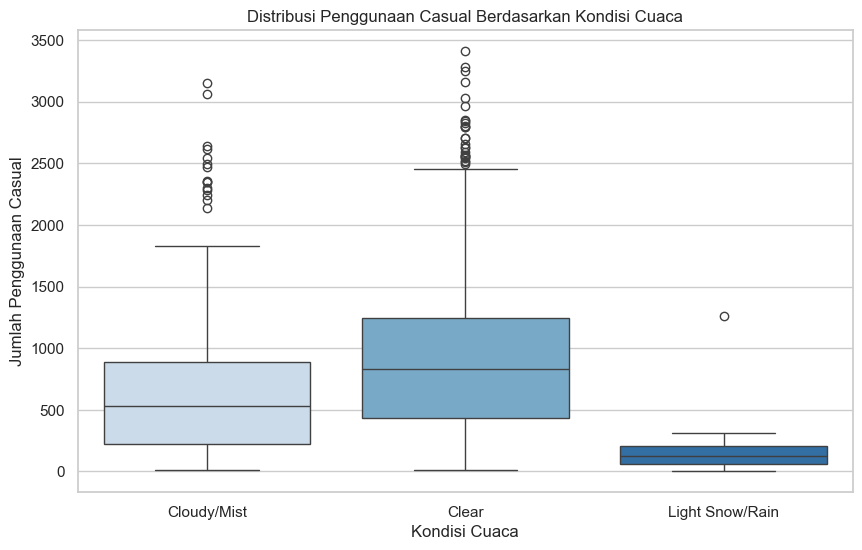

C:\Users\Rakha\AppData\Local\Temp\ipykernel_20356\1575446408.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='registered', data=day_df, palette='Greens')


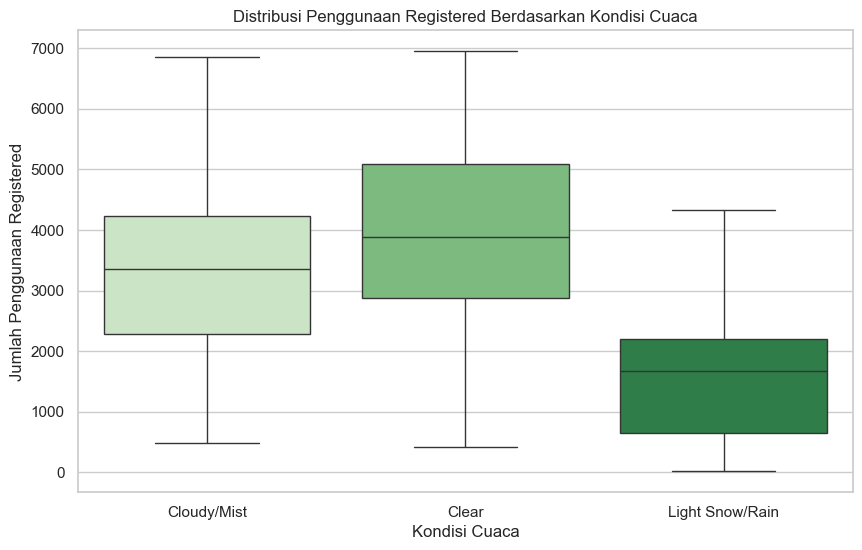

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='casual', data=day_df, palette='Blues')
plt.title('Distribusi Penggunaan Casual Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan Casual')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='registered', data=day_df, palette='Greens')
plt.title('Distribusi Penggunaan Registered Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan Registered')
plt.show()

C:\Users\Rakha\AppData\Local\Temp\ipykernel_20356\1480177772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='casual', data=day_df, palette='Blues')


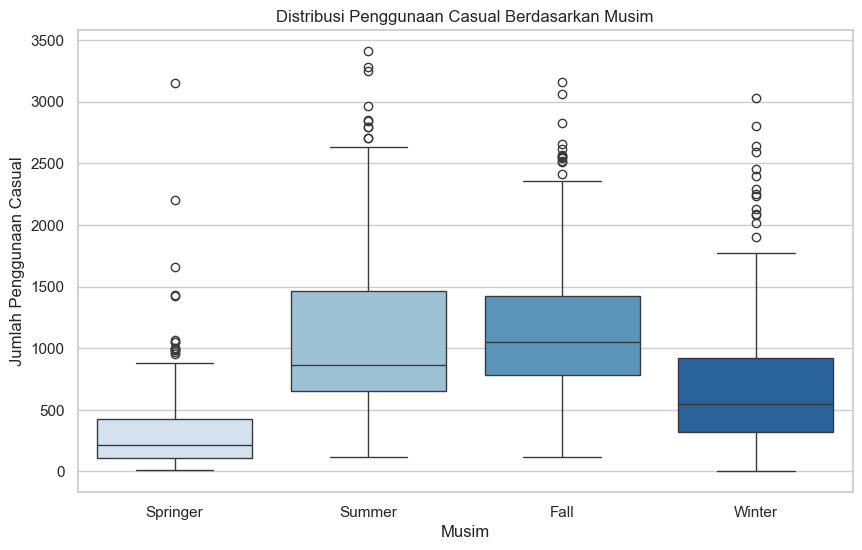

C:\Users\Rakha\AppData\Local\Temp\ipykernel_20356\1480177772.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='registered', data=day_df, palette='Greens')


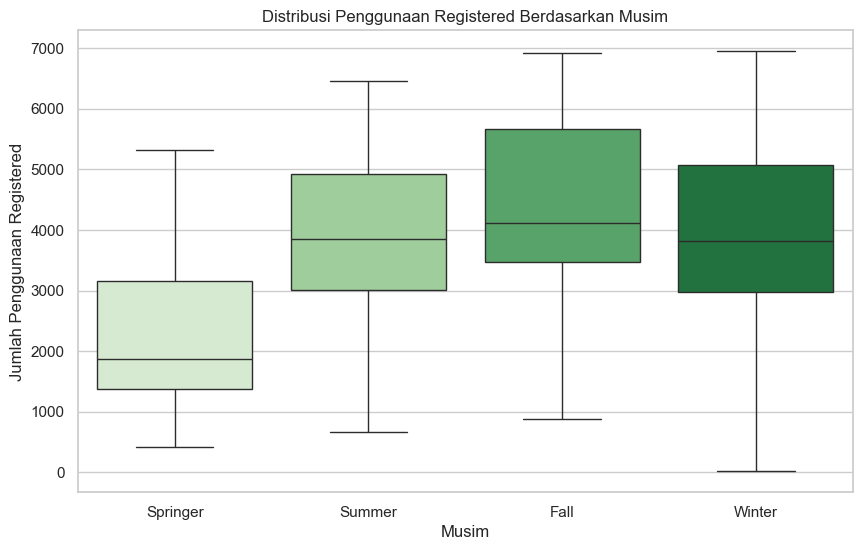

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='casual', data=day_df, palette='Blues')
plt.title('Distribusi Penggunaan Casual Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penggunaan Casual')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='registered', data=day_df, palette='Greens')
plt.title('Distribusi Penggunaan Registered Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penggunaan Registered')
plt.show()

### Apa strategi terbaik untuk meningkatkan penggunaan layanan peminjaman sepeda di hari-hari dengan tingkat penggunaan yang rendah?

In [43]:
day_df['weekday'] = day_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

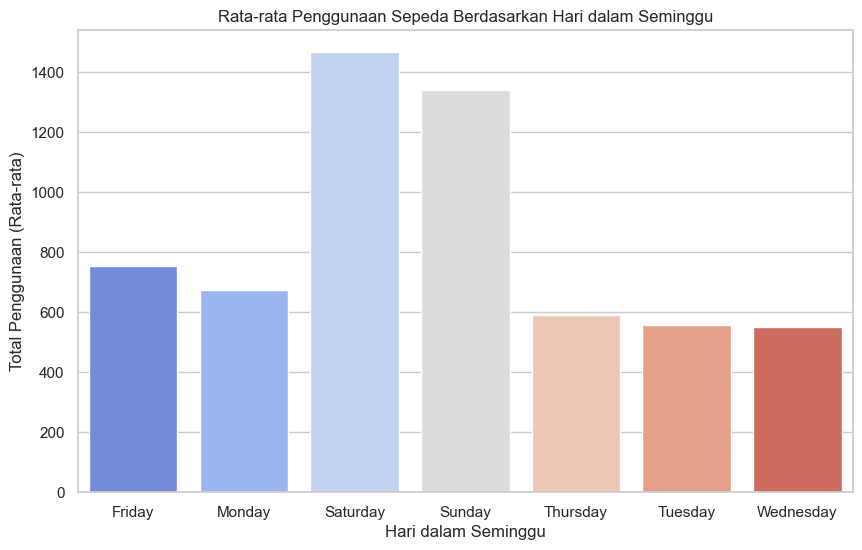

In [79]:
weekday_usage = day_df.groupby('weekday')[['casual', 'registered']].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='casual', data=weekday_usage, hue='weekday', palette='coolwarm', legend=False)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penggunaan (Rata-rata)')
plt.show()

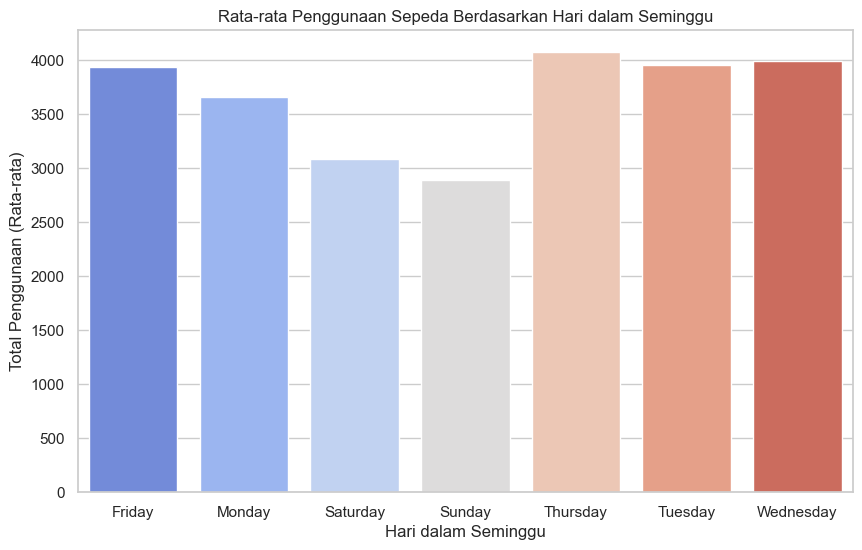

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='registered', data=weekday_usage, hue='weekday', palette='coolwarm', legend=False)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penggunaan (Rata-rata)')
plt.show()


C:\Users\Rakha\AppData\Local\Temp\ipykernel_20356\2295026595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='casual', data=workingday_usage, palette='coolwarm')


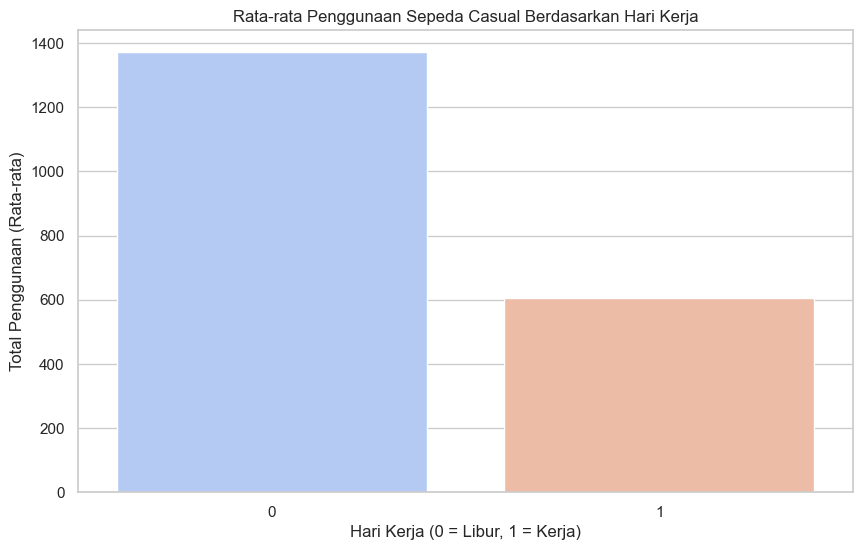

C:\Users\Rakha\AppData\Local\Temp\ipykernel_20356\2295026595.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='casual', data=holiday_usage, palette='coolwarm')


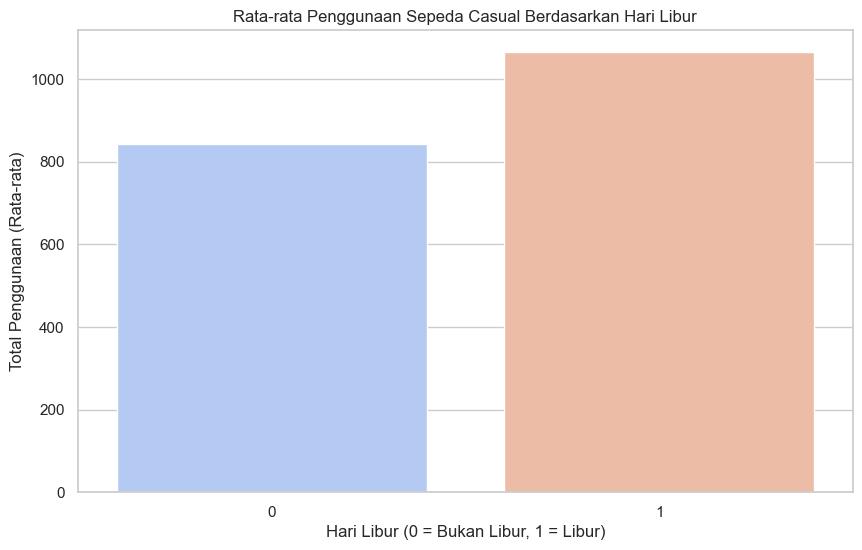

In [99]:
workingday_usage = day_df.groupby('workingday')[['casual', 'registered']].mean().reset_index()
holiday_usage = day_df.groupby('holiday')[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='workingday', y='casual', data=workingday_usage, palette='coolwarm')
plt.title('Rata-rata Penggunaan Sepeda Casual Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Kerja)')
plt.ylabel('Total Penggunaan (Rata-rata)')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='holiday', y='casual', data=holiday_usage, palette='coolwarm')
plt.title('Rata-rata Penggunaan Sepeda Casual Berdasarkan Hari Libur')
plt.xlabel('Hari Libur (0 = Bukan Libur, 1 = Libur)')
plt.ylabel('Total Penggunaan (Rata-rata)')
plt.show()


C:\Users\Rakha\AppData\Local\Temp\ipykernel_20356\388828081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='registered', data=workingday_usage, palette='coolwarm')


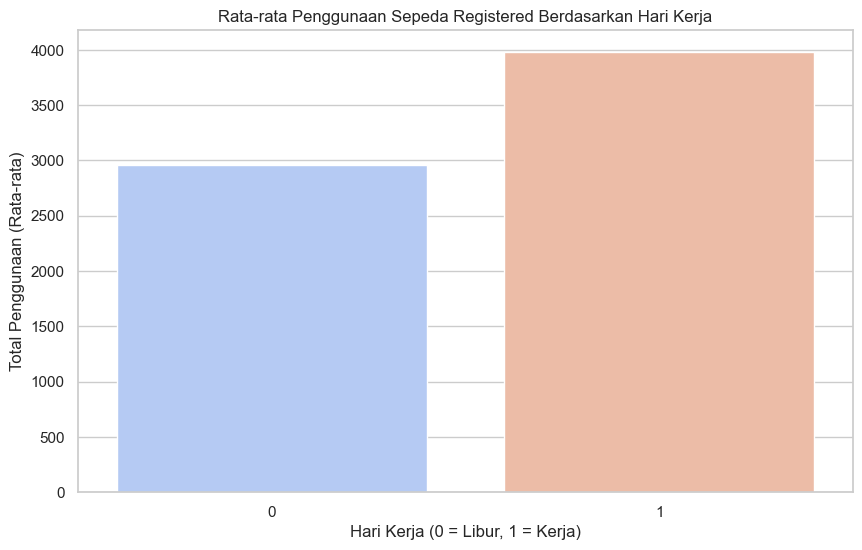

C:\Users\Rakha\AppData\Local\Temp\ipykernel_20356\388828081.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='registered', data=holiday_usage, palette='coolwarm')


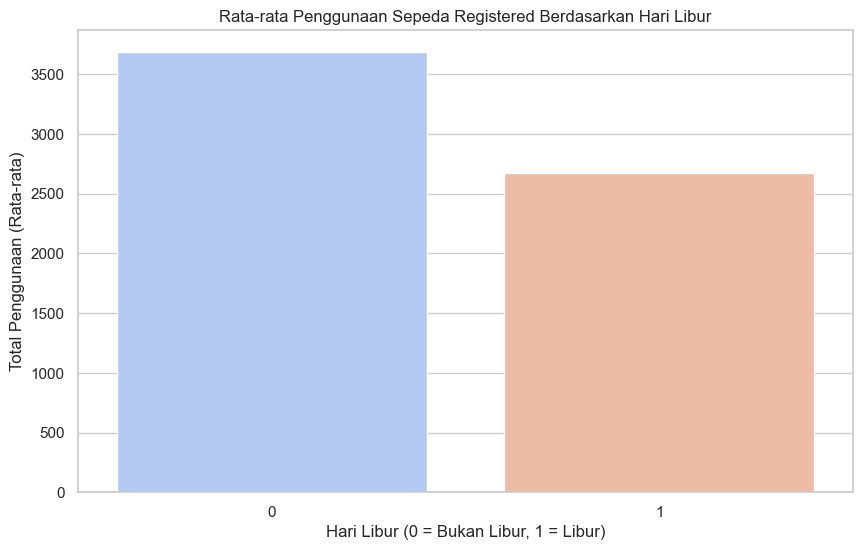

In [101]:
plt.figure(figsize=(10,6))
sns.barplot(x='workingday', y='registered', data=workingday_usage, palette='coolwarm')
plt.title('Rata-rata Penggunaan Sepeda Registered Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Kerja)')
plt.ylabel('Total Penggunaan (Rata-rata)')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='holiday', y='registered', data=holiday_usage, palette='coolwarm')
plt.title('Rata-rata Penggunaan Sepeda Registered Berdasarkan Hari Libur')
plt.xlabel('Hari Libur (0 = Bukan Libur, 1 = Libur)')
plt.ylabel('Total Penggunaan (Rata-rata)')
plt.show()

### Insight
- Kondisi cuaca cerah mendominasi pelanggan peminjaman sepeda casual dan registered.
- Musim gugur mendominasi pelanggan peminjmana sepeda casual dan registered.
- Pelanggan casual tidak konsisten setiap hari di semua kondisi cuaca, sedangkan pelanggan registered konsisten setiap hari di semua kondisi cuaca
- Pelanggan casual juga tidak konsisten setiap hari di setiap musim yang ada.
- Pelanggan registered konsisten setiap hari di setiap musim yang ada.
- Pelanggan casual sering digunakan pada weekend (hari sabtu dan hari minggu) sedangkan pelanggan registered sering digunakan pada hari-hari weekday.

# Kesimpulan 

1. Kondisi cuaca cerah secara signifikan mendominasi penggunaan layanan sepeda, baik oleh pelanggan casual maupun registered. Ini menunjukkan bahwa cuaca yang baik mendorong peningkatan penggunaan layanan sepeda oleh kedua jenis pelanggan.

2. Musim gugur merupakan musim dengan jumlah pelanggan peminjaman sepeda tertinggi untuk pengguna casual dan registered. Hal ini menunjukkan bahwa musim gugur menyediakan kondisi yang optimal bagi penggunaan sepeda, mungkin karena suhu yang nyaman.

3. Pengguna casual menunjukkan pola penggunaan yang tidak konsisten setiap hari, baik di semua kondisi cuaca maupun di setiap musim. Ini mengindikasikan bahwa penggunaan sepeda oleh pelanggan casual lebih dipengaruhi oleh faktor eksternal seperti cuaca, aktivitas spesial, atau preferensi musiman.

4. Sebaliknya, pengguna registered menunjukkan pola penggunaan yang konsisten setiap hari, baik di berbagai kondisi cuaca maupun di semua musim. Ini menunjukkan bahwa pengguna registered cenderung menggunakan layanan sepeda secara lebih teratur, kemungkinan sebagai bagian dari rutinitas harian, seperti perjalanan ke tempat kerja.

5. Pengguna casual lebih sering menggunakan sepeda pada akhir pekan (Sabtu dan Minggu), sementara pengguna registered lebih dominan pada hari kerja. Ini menyoroti bahwa pengguna casual mungkin lebih memanfaatkan layanan untuk rekreasi atau kegiatan non-rutin, sedangkan pengguna registered lebih cenderung menggunakannya sebagai moda transportasi harian.